<a href="https://colab.research.google.com/github/maitysuvo19/internship_root2ai_classify_text/blob/main/Root2ai_classification_bagofwords_INTERPRETATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import os
import pandas as pd
import numpy as np

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words

#pre-processing of text
import string
import re

#import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn import metrics

#import time function from time module to track the training duration
from time import time

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df=pd.read_csv('/content/root2ai - Data.csv')

In [ ]:
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [ ]:
df["Target"].value_counts()/df.shape[0]

FinTech             0.376630
Cyber Security      0.116279
Bigdata             0.099850
Reg Tech            0.097163
credit reporting    0.076991
Blockchain          0.060562
Neobanks            0.047084
Microservices       0.043032
Stock Trading       0.034663
Robo Advising       0.032461
Data Security       0.015284
Name: Target, dtype: float64

In [ ]:
df['Target'] =df.Target.map({'FinTech':1, 'Cyber Security':2,'Bigdata':3,'Reg Tech':4,'credit reporting':5,'Blockchain':6,'Neobanks':7,'Microservices':8,'Stock Trading':9,'Robo Advising':10,'Data Security':11})
df = df[["Text","Target"]]
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,6
1,director could play role financial system,6
2,preliminary discuss secure transaction study r...,6
3,security indeed prove essential transforming f...,6
4,bank settlement normally take three days based...,6


# Text Pre-processing

Typical steps involve tokenization, lower casing, removing, stop words, punctuation markers etc, and vectorization. Other processes such as stemming/lemmatization can also be performed. Here, we are performing the following steps: removing br tags, punctuation, numbers, and stopwords. While we are using sklearn's list of stopwords, there are several other stop word lists (e.g., from NLTK) or sometimes, custom stopword lists are needed depending on the task.

In [ ]:
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): #doc is a string of text
    doc = doc.replace("</br>", " ") #This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    #remove punctuation and numbers
    return doc

# Modeling

In [ ]:
#Step 1: train-test split
X = df.Text.fillna(' ') #the column text contains textual data to extract features from
y = df.Target #this is the column we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
#random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22704,) (22704,)
(17028,) (17028,)
(5676,) (5676,)


In [ ]:
#Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) #instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)#use it to extract features from training data
#transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
#i.e., the dimension of our feature vector is 31195!

(17028, 11329) (5676, 11329)


Naive Bayse Classifier

In [ ]:
#Step 3: Train the classifier and predict for test data
nb = MultinomialNB() #instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)#make class predictions for X_test_dtm

CPU times: user 14.2 ms, sys: 1.84 ms, total: 16 ms
Wall time: 16.2 ms


In [ ]:
#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Accuracy:  0.6719520789288231
              precision    recall  f1-score   support

           1       0.59      0.92      0.72      2168
           2       0.63      0.54      0.58       655
           3       0.86      0.74      0.80       577
           4       0.90      0.80      0.85       532
           5       0.75      0.53      0.62       424
           6       0.80      0.35      0.49       355
           7       0.81      0.08      0.15       272
           8       0.93      0.50      0.65       225
           9       0.82      0.50      0.62       188
          10       0.83      0.14      0.23       185
          11       1.00      0.09      0.17        95

    accuracy                           0.67      5676
   macro avg       0.81      0.47      0.53      5676
weighted avg       0.72      0.67      0.64      5676



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mx=(confusion_matrix(y_test, y_pred_class))
print(conf_mx)

[[1994   86   18    6   35   13    2    1   10    3    0]
 [ 271  353    5    4   13    5    1    1    1    1    0]
 [ 102   12  428   25    5    3    0    0    2    0    0]
 [  56   10   29  427    3    4    1    2    0    0    0]
 [ 174   16    4    2  223    1    1    0    3    0    0]
 [ 194   22    3    0    9  126    0    1    0    0    0]
 [ 234    6    1    1    2    3   22    1    2    0    0]
 [  97    5    2    6    0    1    0  113    1    0    0]
 [  83    6    4    0    0    0    0    0   94    1    0]
 [ 138   13    1    0    6    0    0    1    1   25    0]
 [  40   32    4    4    3    2    0    1    0    0    9]]


In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

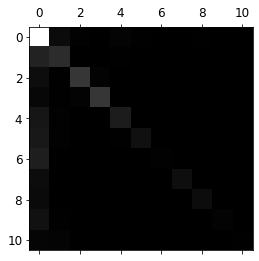

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

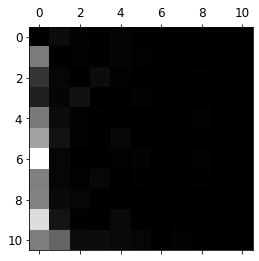

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()